## SDG Attainability for African countries - V.3 - Final
Objective :Use data science techniques to predict which countries can attain or not the SDG goals by 2030
Help to take decision now (2020) on effort to be made by each countries

Data Source : 
    >UN Open data () - Extract by continent (AFRICA) Format : XLS
        https://unstats.un.org/sdgs/indicators/database
        

## 1. INITIAL DATA EXPLORATION AND PROCESSING

>### 1.1 DATA LOADING

In [1]:
import pandas as pd

full_data = pd.read_excel ('D:\TO_BE_CLASSIFIED\Perso\Data Science\Expert Data Science - IBM\Certificate Capstone\DATA\SDGs All Goals - 2020.xlsx', 
                           sheet_name='data', dtype=None)


In [2]:
full_data.dtypes

Goal                   int64
Target                object
Indicator             object
SeriesCode            object
SeriesDescription     object
GeoAreaCode            int64
GeoAreaName           object
TimePeriod             int64
Value                float64
dtype: object

In [4]:
full_data

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,1990,46.00000
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,1993,50.00000
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,1996,49.00000
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,1999,49.00000
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,2002,47.00000
...,...,...,...,...,...,...,...,...,...
343453,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,894,Zambia,2014,131.52688
343454,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,894,Zambia,2015,98.95727
343455,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,894,Zambia,2016,97.34656
343456,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,894,Zambia,2017,101.66199


In [5]:
# Convert into Pandas Dataframe
full_data.shape
df = pd.DataFrame (full_data)

print (df.shape)
df.head(5)

(343458, 9)


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,1990,46.0
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,1993,50.0
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,1996,49.0
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,1999,49.0
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,2002,47.0


In [6]:
# Conversion of column Value to float 

from pandas.api.types import is_numeric_dtype
df.shape
df['Value'].astype('float')                                          ## Convert the column to float
print (df['Value'].apply(type))                                      ## Display the type of the Value column for each row
df['Value_Type'] = df['Value'].apply(lambda x: type(x).__name__)     
df['Value'] = df['Value'].astype('float')
df
is_numeric_dtype(df['Value'])
df['Value'].apply(type).value_counts()

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
343453    <class 'float'>
343454    <class 'float'>
343455    <class 'float'>
343456    <class 'float'>
343457    <class 'float'>
Name: Value, Length: 343458, dtype: object


<class 'float'>    343458
Name: Value, dtype: int64

>### 1.2 DATA CONVERSION - PIVOT TABLE

In [7]:
#
# Use the pivot_table function to convert the dataframe
# "Index" columns do NOT move
# Columns in the "columns" parameter become NEW columns
# The column "value" give the value
#

# Shape input = (280087 rows, 9 columns)
# Shape output = (15606 rows, 38 columns)

by_year_table_df = df.pivot_table(index = ["Goal", "Target", "Indicator", "SeriesCode", "SeriesDescription", 
                                                  "GeoAreaCode", "GeoAreaName"], 
                                                 columns = "TimePeriod", 
                                                 values  = "Value")

In [8]:
by_year_table_df.shape

(17401, 38)

In [9]:
by_year_table_df
# Note that the first 5 columns are in "group by" format 

TimePeriod                                                                                                                     1980  \
Goal Target Indicator SeriesCode   SeriesDescription                                  GeoAreaCode GeoAreaName                         
1    1.1    1.1.1     SI_POV_DAY1  Proportion of population below international po... 2           Africa                        NaN   
                                                                                      11          Western Africa                NaN   
                                                                                      12          Algeria                       NaN   
                                                                                      14          Eastern Africa                NaN   
                                                                                      15          Northern Africa               NaN   
...                                                                                                                             ...   
17   17.9   17.9.1    DC_FTA_TOTAL Total official development assistance (gross di... 800         Uganda                        NaN   
                                                                                      818         Egypt                         NaN   
                                                                                      834         United Republic of Tanzania   NaN   
                                                                                      854         Burkina Faso                  NaN   
                                                                                      894         Zambia                        NaN   

TimePeriod                                                                                                                     1984  \
Goal Target Indicator SeriesCode   SeriesDescription                                  GeoAreaCode GeoAreaName                         
1    1.1    1.1.1     SI_POV_DAY1  Proportion of population below international po... 2           Africa                        NaN   
                                                                                      11          Western Africa                NaN   
                                                                                      12          Algeria                       NaN   
                                                                                      14          Eastern Africa                NaN   
                                                                                      15          Northern Africa               NaN   
...                                                                                                                             ...   
17   17.9   17.9.1    DC_FTA_TOTAL Total official development assistance (gross di... 800         Uganda                        NaN   
                                                                                      818         Egypt                         NaN   
                                                                                      834         United Republic of Tanzania   NaN   
                                                                                      854         Burkina Faso                  NaN   
                                                                                      894         Zambia                        NaN   

TimePeriod                                                                                                                     1985  \
Goal Target Indicator SeriesCode   SeriesDescription                                  GeoAreaCode GeoAreaName                         
1    1.1    1.1.1     SI_POV_DAY1  Proportion of population below international po... 2           Africa                        NaN   
                                                                                   

In [10]:
# To repeat for each row these "grouped by" columns, write the data in csv file 
          
by_year_table_df.to_csv (r'D:\TO_BE_CLASSIFIED\Perso\Data Science\Expert Data Science - IBM\Certificate Capstone\DATA\\export_dataframe.csv', header=True)


In [11]:
# And read it again into a Pandas dataframe

final_data = pd.read_csv ('D:\TO_BE_CLASSIFIED\Perso\Data Science\Expert Data Science - IBM\Certificate Capstone\DATA\\export_dataframe.csv') 

d:\app\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
# Final data format 

print(final_data.shape)

final_data

(17401, 45)


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,1980,1984,1985,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,NaN,NaN,NaN,...,38.00000,37.00000,37.00000,NaN,36.00000,NaN,NaN,NaN,NaN,NaN
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,11,Western Africa,NaN,NaN,NaN,...,46.00000,45.00000,43.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,12,Algeria,NaN,NaN,NaN,...,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,14,Eastern Africa,NaN,NaN,NaN,...,47.00000,47.00000,47.00000,NaN,46.00000,NaN,NaN,44.00000,NaN,NaN
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,15,Northern Africa,NaN,NaN,NaN,...,4.00000,3.00000,3.00000,NaN,3.00000,NaN,NaN,4.00000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17396,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,800,Uganda,NaN,NaN,NaN,...,227.70172,192.37485,206.27561,190.44999,176.82049,165.40205,141.97525,247.58850,NaN,NaN
17397,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,818,Egypt,NaN,NaN,NaN,...,268.18475,313.59386,183.11095,234.26035,592.52705,1235.32663,991.14032,1294.35336,NaN,NaN
17398,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,834,United Republic of Tanzania,NaN,NaN,NaN,...,230.45759,333.24685,323.74505,417.61713,508.84739,348.05457,353.02012,423.75414,NaN,NaN
17399,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,854,Burkina Faso,NaN,NaN,NaN,...,114.77621,143.92018,105.58176,90.99944,142.78599,107.90184,166.66829,225.44658,NaN,NaN


>### 1.3 DATA QUALITY : 
- Drop non-relevent columns after their quality (so much NaN)
- Choice of columns used as LABEL for the supervised algos : Columns 2018, 2019 and 2020. Note that at this point of time, columns 2019 and 2020 are not yet fed entirely.
- Missing values


In [13]:
# Drop non used columns (1980 to 1999)
# Columns 2018, 2019 and 2020 will be used for testing (so, they are kept in the dataset)
#
# Shape : (17401 rows, 28 columns)

final_data = final_data.drop(columns=['1980', '1984','1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999'], axis=1)


In [14]:
# Save the file in csv format
final_data.to_csv (r'D:\\TO_BE_CLASSIFIED\\Perso\\Data Science\\SDG Forcasting\\UN Docs\\export_final_data.csv', header=True)

In [15]:
final_data.shape

(17401, 28)

In [16]:
final_data

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,NaN,NaN,47.00000,...,38.00000,37.00000,37.00000,NaN,36.00000,NaN,NaN,NaN,NaN,NaN
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,11,Western Africa,NaN,NaN,54.00000,...,46.00000,45.00000,43.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,12,Algeria,NaN,NaN,NaN,...,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,14,Eastern Africa,NaN,NaN,60.00000,...,47.00000,47.00000,47.00000,NaN,46.00000,NaN,NaN,44.00000,NaN,NaN
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,15,Northern Africa,NaN,NaN,8.00000,...,4.00000,3.00000,3.00000,NaN,3.00000,NaN,NaN,4.00000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17396,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,800,Uganda,317.84961,210.42637,100.36296,...,227.70172,192.37485,206.27561,190.44999,176.82049,165.40205,141.97525,247.58850,NaN,NaN
17397,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,818,Egypt,257.19466,495.90072,701.07622,...,268.18475,313.59386,183.11095,234.26035,592.52705,1235.32663,991.14032,1294.35336,NaN,NaN
17398,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,834,United Republic of Tanzania,273.48852,176.96487,188.65017,...,230.45759,333.24685,323.74505,417.61713,508.84739,348.05457,353.02012,423.75414,NaN,NaN
17399,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,854,Burkina Faso,219.07600,160.19524,71.60986,...,114.77621,143.92018,105.58176,90.99944,142.78599,107.90184,166.66829,225.44658,NaN,NaN


In [17]:
#
# Count the NaN or null values in the dataframe (percentage)
#

r = final_data.shape[0]
c = final_data.shape[1] - 7 # Only datapooints columns : 2000 to 2020.
nan = final_data.isnull().sum().sum() 

print ('%s Rows X %s Columns = %s datapoints.' % (r, c, r * c) )
print ('Total number of NaN values : %s datapoints that means %.2f %%' % (nan, nan / (r * c) * 100 ))


17401 Rows X 21 Columns = 365421 datapoints.
Total number of NaN values : 234530 datapoints that means 64.18 %


In [18]:
# 
# Null values repartition by SDGs objectives
#
#datapoints_by_goal = []
#nan_list = list()

nan_list = pd.DataFrame(columns=['Goal', 'Datapoints','Nan_percentage'],index=range(17))
             
for i in range (17):
    r = final_data[final_data['Goal']== i+1].shape[0]
    c = final_data.shape[1] - 7
    
    nan_by_goal = final_data[final_data['Goal']==i+1].isnull().sum().sum() 
    # datapoint_by_goal [i]  = r 
    
    # print ('%s Rows X %s Columns = %s datapoints.' % (r, c, r * c) )
    # print ('Total number of NaN values in Goal %d : %s datapoints that means %.2f %%' % (i + 1, nan_by_goal, nan_by_goal / (r * c) * 100 ))
    
    nan_list ['Goal'][i] = i + 1
    nan_list ['Datapoints'][i] = r * c
    nan_list ['Nan_percentage'][i] = round(nan_by_goal / (r * c) * 100,2)
    
nan_list

,Goal,Datapoints,Nan_percentage
0,1,30366,69.53
1,2,20181,63.01
2,3,49266,59.51
3,4,18270,78.04
4,5,31458,83.46
5,6,22050,58.75
6,7,7308,18.95
7,8,18627,49.49
8,9,17871,50.51
9,10,16002,55.45


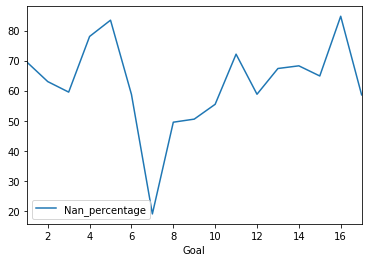

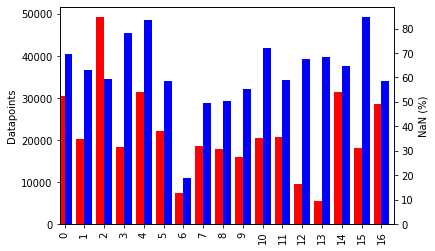

d:\app\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [20]:
#
# Plot and visualize the importance of the missing data compared with the available datapoints by goal
#

import matplotlib.pyplot as plt

nan_list.plot(x='Goal', y='Nan_percentage')

# nan_list.plot.barh(x='Goal', stacked=True);

# Interesting goals are the ones with less number of NaN : Goals 7,8,9,10 and 17
#

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

nan_list.Datapoints.plot(kind='bar', color='red', ax=ax, width=width, position=1)
nan_list.Nan_percentage.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Datapoints')
ax2.set_ylabel('NaN (%)')

plt.show()

fig.show()

>### 1.4 FILL MISSING VALUES - LINEAR INTERPOLATION

In [22]:
# Use a linear interpolation on data from 2000 to 2018 to fill MISSING VALUES
#
cols = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
final_data[cols] = final_data[cols].interpolate(method="linear", limit_direction="both", axis=1)


In [23]:
final_data

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,47.00000,47.00000,47.00000,...,38.00000,37.00000,37.00000,36.50000,36.00000,36.00000,36.00000,NaN,NaN,NaN
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,11,Western Africa,54.00000,54.00000,54.00000,...,46.00000,45.00000,43.00000,43.00000,43.00000,43.00000,43.00000,NaN,NaN,NaN
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,12,Algeria,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,14,Eastern Africa,60.00000,60.00000,60.00000,...,47.00000,47.00000,47.00000,46.50000,46.00000,46.00000,46.00000,44.00000,NaN,NaN
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,15,Northern Africa,8.00000,8.00000,8.00000,...,4.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,4.00000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17396,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,800,Uganda,317.84961,210.42637,100.36296,...,227.70172,192.37485,206.27561,190.44999,176.82049,165.40205,141.97525,247.58850,NaN,NaN
17397,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,818,Egypt,257.19466,495.90072,701.07622,...,268.18475,313.59386,183.11095,234.26035,592.52705,1235.32663,991.14032,1294.35336,NaN,NaN
17398,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,834,United Republic of Tanzania,273.48852,176.96487,188.65017,...,230.45759,333.24685,323.74505,417.61713,508.84739,348.05457,353.02012,423.75414,NaN,NaN
17399,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,854,Burkina Faso,219.07600,160.19524,71.60986,...,114.77621,143.92018,105.58176,90.99944,142.78599,107.90184,166.66829,225.44658,NaN,NaN


In [24]:
#
# After linear interpolation
# Count again the NaN or null values in the dataframe (percentage)
#

r = final_data.shape[0]
c = final_data.shape[1]
nan = final_data.isnull().sum().sum() 

print ('%s Rows X %s Columns = %s datapoints.' % (r, c, r * c) )
print ('Total number of NaN values : %s datapoints that means %.2f %%' % (nan, nan / (r * c) * 100 ))


17401 Rows X 28 Columns = 487228 datapoints.
Total number of NaN values : 84719 datapoints that means 17.39 %


In [25]:
# Check rows containing NaN value
# and drop them (because there is NO datapoint from 2000 to 2018)
# 
nan_df = final_data[final_data.isna().any(axis=1)]
print ('%s ROWS : No way to interpolate because no datapoints at all - to be dropped ' % nan_df.shape[0])

16889 ROWS : No way to interpolate because no datapoints at all - to be dropped 


In [26]:
# Drop these empty rows 
# Do NOT touch 2019 and 2020 columns even they have NaN values
#
final_data = final_data.dropna(subset=cols)

In [27]:
# Finally, we get the cleaned dataset
final_data.shape

(14853, 28)

In [28]:
final_data.reset_index(drop=True, inplace=True)

In [29]:
final_data

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,47.00000,47.00000,47.00000,...,38.00000,37.00000,37.00000,36.50000,36.00000,36.00000,36.00000,NaN,NaN,NaN
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,11,Western Africa,54.00000,54.00000,54.00000,...,46.00000,45.00000,43.00000,43.00000,43.00000,43.00000,43.00000,NaN,NaN,NaN
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,12,Algeria,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,14,Eastern Africa,60.00000,60.00000,60.00000,...,47.00000,47.00000,47.00000,46.50000,46.00000,46.00000,46.00000,44.00000,NaN,NaN
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,15,Northern Africa,8.00000,8.00000,8.00000,...,4.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,4.00000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14848,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,800,Uganda,317.84961,210.42637,100.36296,...,227.70172,192.37485,206.27561,190.44999,176.82049,165.40205,141.97525,247.58850,NaN,NaN
14849,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,818,Egypt,257.19466,495.90072,701.07622,...,268.18475,313.59386,183.11095,234.26035,592.52705,1235.32663,991.14032,1294.35336,NaN,NaN
14850,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,834,United Republic of Tanzania,273.48852,176.96487,188.65017,...,230.45759,333.24685,323.74505,417.61713,508.84739,348.05457,353.02012,423.75414,NaN,NaN
14851,17,17.9,17.9.1,DC_FTA_TOTAL,Total official development assistance (gross d...,854,Burkina Faso,219.07600,160.19524,71.60986,...,114.77621,143.92018,105.58176,90.99944,142.78599,107.90184,166.66829,225.44658,NaN,NaN


>### 1.5 DESCRIPTIVE STATISTICS AND VIZUALISATIONS

In [30]:
df_211 = final_data.loc[final_data['Indicator'] == '2.1.1']

In [31]:
print (df_211.shape)
df_211.head(50)

(88, 28)


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1326,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),2,Africa,24.5,23.6,23.3,...,18.3,18.1,18.0,17.6,18.3,18.5,18.6,18.6,19.1,NaN
1327,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),11,Western Africa,16.0,15.8,15.7,...,12.0,12.2,11.8,13.3,14.3,14.2,14.6,14.3,15.2,NaN
1328,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),12,Algeria,8.0,8.0,7.4,...,4.0,3.5,3.3,3.3,3.2,3.2,3.1,2.8,NaN,NaN
1329,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),14,Eastern Africa,39.2,37.5,37.0,...,27.5,27.3,27.4,26.2,26.9,27.1,26.8,26.7,27.2,NaN
1330,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),15,Northern Africa,10.1,9.5,9.2,...,8.7,7.8,7.7,6.1,6.2,6.3,6.6,6.3,6.5,NaN
1331,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),17,Middle Africa,41.7,39.7,38.8,...,29.2,29.0,28.6,26.8,28.2,28.8,28.7,29.0,29.8,NaN
1332,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),18,Southern Africa,5.9,5.5,5.6,...,5.5,5.5,5.8,6.3,7.0,8.0,7.0,7.9,8.4,NaN
1333,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),24,Angola,67.5,67.5,63.2,...,37.0,35.4,29.2,23.1,19.0,19.5,19.4,18.6,NaN,NaN
1334,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),72,Botswana,23.2,23.2,23.1,...,24.4,23.3,20.7,19.4,18.6,20.5,22.4,24.1,NaN,NaN
1335,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),120,Cameroon,23.1,23.1,20.9,...,8.2,7.1,6.8,6.7,6.7,6.5,6.4,6.3,NaN,NaN


In [32]:
import matplotlib.pyplot as plt

# Consider only an indicator (e.g. 1.1.1) to plot (Spagethi format)
#df = final_data.loc[final_data['Indicator'] == '2.1.1']

df = final_data.loc[(final_data["Indicator"] == '2.1.1') & (final_data["GeoAreaName"] == 'Burkina Faso')]
df.head(100)

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1369,2,2.1,2.1.1,SN_ITK_DEFC,Prevalence of undernourishment (%),854,Burkina Faso,24.5,24.5,24.2,...,18.8,18.5,17.9,17.6,17.6,18.1,18.7,19.2,NaN,NaN
1413,2,2.1,2.1.1,SN_ITK_DEFCN,Number of undernourish people (millions),854,Burkina Faso,2.9,2.9,3.0,...,3.0,3.1,3.1,3.1,3.2,3.4,3.6,3.8,NaN,NaN


In [33]:
# Number of indicators to be consedered in the dataset
#
print('There are {} unique indicators.'.format(len(final_data['Indicator'].unique())))

# Number of countries in the dataset
#
print('There are {} unique countries.'.format(len(final_data['GeoAreaName'].unique())))


There are 185 unique indicators.
There are 64 unique countries.


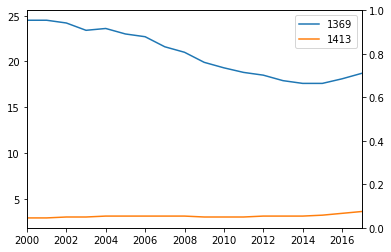

In [34]:
from matplotlib import pyplot

df = df [cols]
ax = df.T.plot (kind='line')
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
#ax.set_ylabel(cols)


## 2. CREATE THE MODEL - Model #1
### LSTM UNIVARIATE MULTI-STEPS (Vector Output Model)
    As with one-step forecasting, a time series used for multi-step time series forecasting must be split into samples 
    with input and output components.
    Both the input and output components will be comprised of multiple time steps and may or may not have the same number 
    of steps.
    

In [36]:
#
# Convert each line of the dataframe into list (time series) keeping just the columns 2000 to 2017 (Training set)
#

index_test = 1369
ts_list = final_data[cols].values.tolist()
ts_list [index_test]               ## This is the x-th line from the dataframe

[24.5,
 24.5,
 24.2,
 23.4,
 23.6,
 23.0,
 22.7,
 21.6,
 21.0,
 19.9,
 19.3,
 18.8,
 18.5,
 17.9,
 17.6,
 17.6,
 18.1,
 18.7]

In [37]:
#
# multi-step data preparation: It aims to split each sequence (ts_list) into 2 lists X (input) and y (output)
# X (Input) has n_steps_in datapoints from ts_list.
# y (Output) has the next n_steps_out datapoints from ts_list
#

from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [38]:
# Build test list from the columns 2018, 2019, 2020
test_list = final_data[['2018', '2019','2020']] 
print(test_list)

#
# Count the NaN or null values in the TEST LIST dataframe (percentage)
#

r = test_list.shape[0]
c = test_list.shape[1] 
nan = test_list.isnull().sum().sum() 

print ('BEFORE LINARIZATION : %s Rows X %s Columns = %s datapoints.' % (r, c, r * c) )
print ('BEFORE LINARIZATION : Total number of NaN values : %s datapoints that means %.2f %%' % (nan, nan / (r * c) * 100 ))

# Use a linear interpolation on data from 2000 to 2018 to fill MISSING VALUES
#
cols = ['2018','2019','2020'] 
test_list[cols] = test_list[cols].interpolate(method="linear", limit_direction="both", axis=1)

nan = test_list.isnull().sum().sum() 
print ('AFTER LINARIZATION : %s Rows X %s Columns = %s datapoints.' % (r, c, r * c) )
print ('AFTER LINARIZATION : Total number of NaN values : %s datapoints that means %.2f %%' % (nan, nan / (r * c) * 100 ))

test_list = test_list[cols].values.tolist()

test_list [index_test]

             2018  2019  2020
0             NaN   NaN   NaN
1             NaN   NaN   NaN
2             NaN   NaN   NaN
3        44.00000   NaN   NaN
4         4.00000   NaN   NaN
...           ...   ...   ...
14848   247.58850   NaN   NaN
14849  1294.35336   NaN   NaN
14850   423.75414   NaN   NaN
14851   225.44658   NaN   NaN
14852   106.53504   NaN   NaN

[14853 rows x 3 columns]
BEFORE LINARIZATION : 14853 Rows X 3 Columns = 44559 datapoints.
BEFORE LINARIZATION : Total number of NaN values : 33773 datapoints that means 75.79 %
AFTER LINARIZATION : 14853 Rows X 3 Columns = 44559 datapoints.
AFTER LINARIZATION : Total number of NaN values : 21570 datapoints that means 48.41 %


d:\app\Anaconda\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


[19.2, 19.2, 19.2]

In [39]:
# convert time series from "ts_list" to SEQUENCE

# choose a number of time steps INPUT and OUTPUT
n_steps_in, n_steps_out = 2, 3                     

# split into samples
X, y = split_sequence(ts_list [index_test], n_steps_in, n_steps_out)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


[24.5 24.5] [24.2 23.4 23.6]
[24.5 24.2] [23.4 23.6 23. ]
[24.2 23.4] [23.6 23.  22.7]
[23.4 23.6] [23.  22.7 21.6]
[23.6 23. ] [22.7 21.6 21. ]
[23.  22.7] [21.6 21.  19.9]
[22.7 21.6] [21.  19.9 19.3]
[21.6 21. ] [19.9 19.3 18.8]
[21.  19.9] [19.3 18.8 18.5]
[19.9 19.3] [18.8 18.5 17.9]
[19.3 18.8] [18.5 17.9 17.6]
[18.8 18.5] [17.9 17.6 17.6]
[18.5 17.9] [17.6 17.6 18.1]
[17.9 17.6] [17.6 18.1 18.7]


In [40]:
# The LSTM expects data to have a three-dimensional structure of [samples, timesteps, features] for the input data X, 
# and in this case, we want to have n_feature feature(s).
#
# Reshape from [samples, timesteps] into [samples, timesteps, features]
#
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X[0], y[0]

(array([[24.5],
        [24.5]]), array([24.2, 23.4, 23.6]))

In [41]:
X, y

(array([[[24.5],
         [24.5]],
 
        [[24.5],
         [24.2]],
 
        [[24.2],
         [23.4]],
 
        [[23.4],
         [23.6]],
 
        [[23.6],
         [23. ]],
 
        [[23. ],
         [22.7]],
 
        [[22.7],
         [21.6]],
 
        [[21.6],
         [21. ]],
 
        [[21. ],
         [19.9]],
 
        [[19.9],
         [19.3]],
 
        [[19.3],
         [18.8]],
 
        [[18.8],
         [18.5]],
 
        [[18.5],
         [17.9]],
 
        [[17.9],
         [17.6]]]), array([[24.2, 23.4, 23.6],
        [23.4, 23.6, 23. ],
        [23.6, 23. , 22.7],
        [23. , 22.7, 21.6],
        [22.7, 21.6, 21. ],
        [21.6, 21. , 19.9],
        [21. , 19.9, 19.3],
        [19.9, 19.3, 18.8],
        [19.3, 18.8, 18.5],
        [18.8, 18.5, 17.9],
        [18.5, 17.9, 17.6],
        [17.9, 17.6, 17.6],
        [17.6, 17.6, 18.1],
        [17.6, 18.1, 18.7]]))

In [42]:
# define model
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))

model.compile(optimizer='Adamax', loss='mse', metrics=['mse', 'accuracy'])

# model.compile(optimizer='RMSProp', loss='mse')


Using TensorFlow backend.


In [43]:
from keras.utils.vis_utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#plot_model(model, show_shapes=True, show_layer_names=True)

dict_keys(['val_loss', 'val_mse', 'val_accuracy', 'loss', 'mse', 'accuracy'])


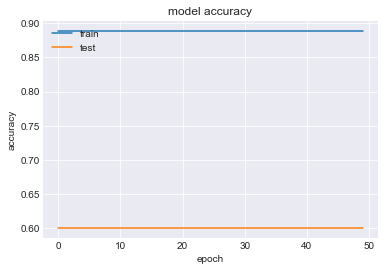

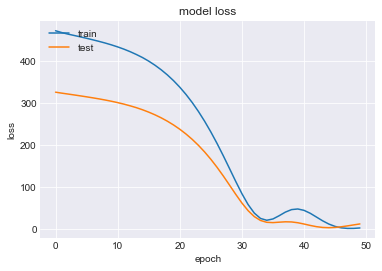

In [44]:
# fit model
#history = model.fit(X, y, epochs=50, verbose=0)

# Fit the model
history = model.fit(X, y,validation_split=0.33, epochs=50, verbose=0)       # batch_size=10, 
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# history = model.fit(X, y, epochs=50, batch_size=72, validation_data=(test_list[index_test], ????), verbose=2, shuffle=False)
# model.evaluate(np.asarray([np.zeros((2))]), np.asarray([np.zeros((12))]))

In [46]:
# Make Prediction
#x_input = array([234.26035, 592.52705, 1235.32663, 991.14032])
x_input = array([17.6, 18.3])
x_input = x_input.reshape(1, n_steps_in, 1)
yhat = model.predict(x_input, verbose=0)
yhat = yhat.reshape(-1)
print(test_list[index_test], yhat)

[19.2, 19.2, 19.2] [13.797518 13.308092 13.544652]


In [47]:
yhat

array([13.797518, 13.308092, 13.544652], dtype=float32)

In [48]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
rmse = sqrt(mean_squared_error(test_list[index_test], yhat)) 

print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.653
